**Ho Wa Chu**

Spring 2023

CS 252: Mathematical Data Analysis and Visualization

Project 3: Linear regression

QR-based linear regression and polynomial regression

In [122]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Notes

- In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:
    - `np.linalg.inv`
    - `scipy.linalg.lstsq` (in `LinearRegression::linear_regression_scipy` only).
    - `np.linalg.norm`
    - `scipy.linalg.solve_triangular`, 

## Task 4: Implement a QR based linear regression solver

### 4a) QR-decomposition

- Write algorithm to compute QR decomposition (`linear_regression::qr_decomposition`). **Run test code below.** Equation for R: $$R = Q^TA$$
- Implement `linear_regression::linear_regression_qr` to use the QR decomposition to do the linear regression. Recall that the equation is $$Rc = Q^Ty$$ which can be solved without taking the inverse of $R$ through backsolving.

#### Test QR decomposition

In [123]:
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)

A = iris_data.select_data(['sepal_length', 'petal_width'])
A1 = np.hstack([A, np.ones([len(A), 1])])

lin_reg_qr = linear_regression.LinearRegression(iris_data)
myQ, myR = lin_reg_qr.qr_decomposition(A1)

Q, R = np.linalg.qr(A1)

print('NOTE: It is ok if numbers match but whole columns are negated.\n')
print(f'Your Q shape is {myQ.shape} and should be {Q.shape}')
print(f'Your R shape is {myR.shape} and should be {R.shape}')
print(f'1st few rows of your Q are\n{myQ[:3]} and should be\n{Q[:3]}')
print(f'\nYour R is\n{myR[:5]} and should be\n{R[:5]}')

NOTE: It is ok if numbers match but whole columns are negated.

Your Q shape is (150, 3) and should be (150, 3)
Your R shape is (3, 3) and should be (3, 3)
1st few rows of your Q are
[[ 0.07056 -0.11765  0.00009]
 [ 0.0678  -0.11202  0.0339 ]
 [ 0.06503 -0.10638  0.06772]] and should be
[[-0.07056 -0.11765 -0.00009]
 [-0.0678  -0.11202 -0.0339 ]
 [-0.06503 -0.10638 -0.06772]]

Your R is
[[72.27621 15.60873 12.12709]
 [-0.       7.66143 -1.22542]
 [-0.      -0.       1.19668]] and should be
[[-72.27621 -15.60873 -12.12709]
 [  0.        7.66143  -1.22542]
 [  0.        0.       -1.19668]]


#### Test linear regression via QR decomposition

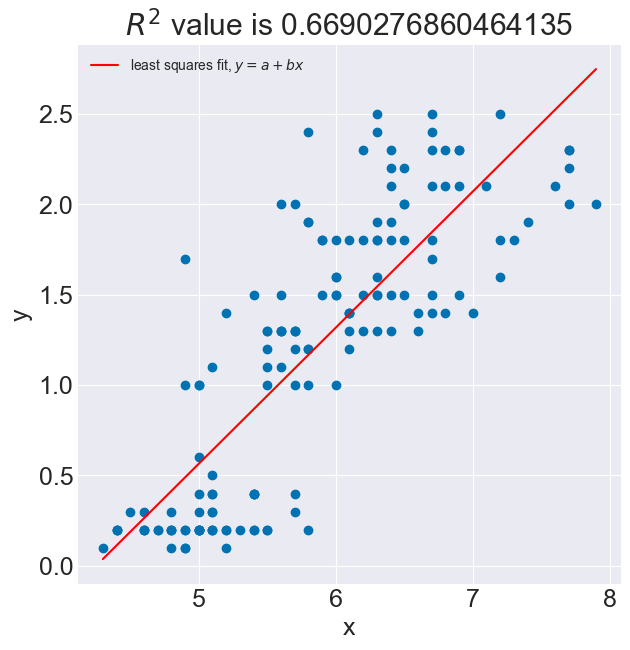

In [142]:
lin_reg_qr.linear_regression(['sepal_length'], 'petal_width', 'qr')
lin_reg_qr.scatter('sepal_length', 'petal_width', '')
lin_reg_qr.show()

**Question 4:** How do your results compare to the built-in SciPy solver? Is this what you expected? Why or why not?

**Answer 4:** 
Both regression models resulted in the same R^2 value. This is expected because despite both models having different approaches, the goal is still to find the best set of coefficients that minimizes MSE. We are also not predicting any data here, as we are using our original data to test the fit of the line, so both models should result in the same R^2 value.

### Task 4b) Compare performance of the linear regression methods

- In the cell below, load in the brain network `brain.csv` dataset.
- Create `Data` and `LinearRegression` objects.
- Load in the list of variable names in the brain dataset (62)
- Do multiple linear regressions, separately for each of the linear regression methods that you have implemented (including `scipy`): Set all brain data variables except for the last one as the independent variables, the last variable is the depenendent variable.
- Compute and print the mean squared error (MSE) in the predictions made by each linear regression model and the actual y values.

In [144]:
brain_filename = 'data/brain.csv'
brain_data = data.Data(brain_filename)

lin_reg = linear_regression.LinearRegression(brain_data)
print(brain_data.get_headers())
print(len(brain_data.get_headers()))

lin_reg.linear_regression(['1', '1.1', '2', '2.1', '3', '3.1', '4', '4.1', '5', '5.1', '6', '6.1', '6.2', '6.3', '7', '7.1', '7.2', '7.3', '7.4', '7.5', '8', '8.1', '8.2', '8.3', '8.4', '8.5', '9', '9.1', '10', '10.1', '11', '11.1', '12', '12.1', '12.2', '12.3', '12.4', '13', '13.1', '13.2', '13.3', '13.4', '13.5', '14', '14.1', '15', '15.1', '16', '16.1', '16.2', '16.3', '16.4', '16.5', '16.6', '16.7', '17', '17.1', '17.2', '17.3', '17.4', '17.5'], '17.6', 'scipy')
print(lin_reg.compute_mse())

lin_reg.linear_regression(['1', '1.1', '2', '2.1', '3', '3.1', '4', '4.1', '5', '5.1', '6', '6.1', '6.2', '6.3', '7', '7.1', '7.2', '7.3', '7.4', '7.5', '8', '8.1', '8.2', '8.3', '8.4', '8.5', '9', '9.1', '10', '10.1', '11', '11.1', '12', '12.1', '12.2', '12.3', '12.4', '13', '13.1', '13.2', '13.3', '13.4', '13.5', '14', '14.1', '15', '15.1', '16', '16.1', '16.2', '16.3', '16.4', '16.5', '16.6', '16.7', '17', '17.1', '17.2', '17.3', '17.4', '17.5'], '17.6', 'normal')
print(lin_reg.compute_mse())

lin_reg.linear_regression(['1', '1.1', '2', '2.1', '3', '3.1', '4', '4.1', '5', '5.1', '6', '6.1', '6.2', '6.3', '7', '7.1', '7.2', '7.3', '7.4', '7.5', '8', '8.1', '8.2', '8.3', '8.4', '8.5', '9', '9.1', '10', '10.1', '11', '11.1', '12', '12.1', '12.2', '12.3', '12.4', '13', '13.1', '13.2', '13.3', '13.4', '13.5', '14', '14.1', '15', '15.1', '16', '16.1', '16.2', '16.3', '16.4', '16.5', '16.6', '16.7', '17', '17.1', '17.2', '17.3', '17.4', '17.5'], '17.6', 'qr')
print(lin_reg.compute_mse())


['1', '1.1', '2', '2.1', '3', '3.1', '4', '4.1', '5', '5.1', '6', '6.1', '6.2', '6.3', '7', '7.1', '7.2', '7.3', '7.4', '7.5', '8', '8.1', '8.2', '8.3', '8.4', '8.5', '9', '9.1', '10', '10.1', '11', '11.1', '12', '12.1', '12.2', '12.3', '12.4', '13', '13.1', '13.2', '13.3', '13.4', '13.5', '14', '14.1', '15', '15.1', '16', '16.1', '16.2', '16.3', '16.4', '16.5', '16.6', '16.7', '17', '17.1', '17.2', '17.3', '17.4', '17.5', '17.6']
62
8.668995290464749e-26
117245.22986180494
7.9568718487444475e-25


**Question 5:** What are the mean squared errors for each of the regression methods on the brain data? Which method(s) do best and which do the worst **and why**?

**Answer 5:** 
The value of MSE represent how far off the predicted value was from the true value. The higher the MSE, the worst the regression did. The MSE for SciPy solver appears to be the smallest, so it seems to be the best method for the Brain dataset. It should be noted that the SciPy and QR method both got similar MSE values as the QR method was a deciminal point away. This means that both QR and the SciPy methods can be considered the best. The normal equation method has the highest MSE, indicating that it is the worst method for this dataset and set of features. 





## Task 5: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit data with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a simple linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$ 

Complete the following steps to add support for polynomial regression in your `LinearRegression` class.

### 5a) Build the polynomial matrix of the independent variable

The polynomial matrix contains the independent variable raised to a different power in each column. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).

**TODO:**
Implement and test `LinearRegression::make_polynomial_matrix` (*helper method*) that takes care of raising the independent variable samples to different powers.

##### Test `make_polynomial_matrix`

In [126]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]



### 5b) Add support for polynomial regression

This can be performed in 3 steps:

1. Implement the `LinearRegression::polynomial_regression` method to perform the polynomial regression (*alternate option: you may instead update your `linear_regression` method. If you decide to go this route, add a keyword argument for the polynomial degree with a default value of 1 to preserve compatability with regular linear regression.*).
    - I suggest using your QR solver, but you could use any of the ones you have implemented.
2. Update `LinearRegression::predict`: Run `make_polynomial_matrix` on the "A" matrix that enters into the computation $y = Ac$ if `self.p > 1`.
3. Add support for plotting polynomials in `LinearRegression::scatter` by generalizing the plotted regression line to a regression polynomial if `self.p > 1`:
    - Getting your polynomial "x" values: Run `make_polynomial_matrix` on your evenly-spaced line sample points. To get the shapes to work out, you may need to add a trailing singleton dimension to your "x" sample points. For example, if you have 1000 "x" sample points, make the shape `(1000, 1)` rather than `(1000,)`.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.

*There is no explicit test code here — visualizing the fit in the next subtask will help you debug!*

### 5c) Run a polynomial regression

In this subtask, you will debug your polynomial regression implementation and experiment fitting some data with it.

#### Test: Polynomial regression with linear model ($p = 1$)

- In the cell below, fit the `poly_data.csv` dataset using polynomial regression where the polynomial degree $p = 1$. Use your QR solver.
- Use `scatter` to plot the results.
- Print out the mean squared error.

The plot created by running the below cell should "look right" to you.

71.81095284569933


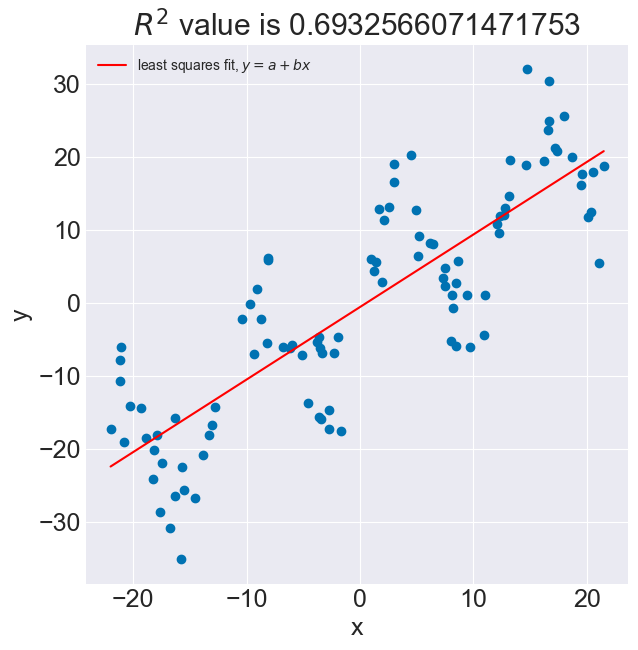

In [146]:
poly_filename = 'data/poly_data.csv'
poly_data = data.Data(poly_filename)
poly_reg = linear_regression.LinearRegression(poly_data)

poly_reg.poly_regression('X', 'Y', p = 1)
poly_reg.scatter('X', 'Y', 'X vs. Y')
print(poly_reg.compute_mse())

#### Test: polynomial regression with high degree polynomials

Repeat the steps from the $p = 1$ test above in the cell below, but this time try $p = 15$. 

*Your regression fit should not be a line!*

15.929357922922517


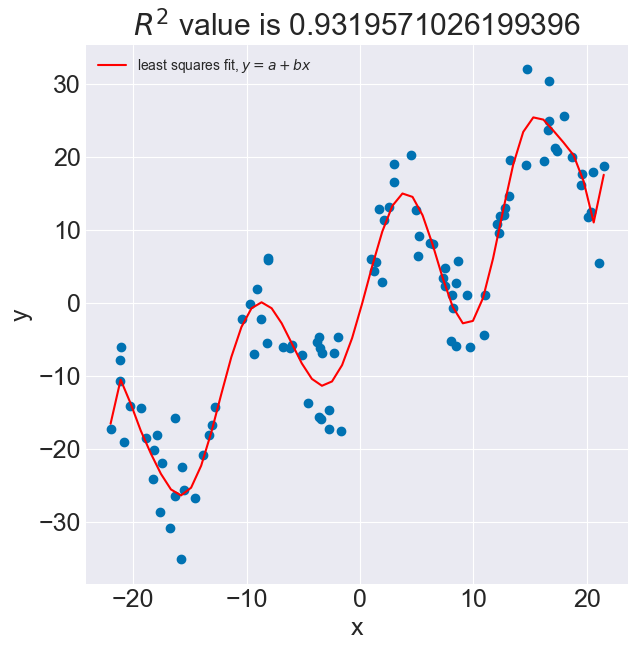

In [145]:
poly_filename = 'data/poly_data.csv'
poly_data = data.Data(poly_filename)
poly_reg = linear_regression.LinearRegression(poly_data)
poly_reg.poly_regression('X', 'Y', 15)
poly_reg.scatter('X', 'Y', 'X vs. Y')
print(poly_reg.compute_mse())

**Question 6:** Describe the fit compared to `p=1` — is it better or worse? Why?

**Question 7:** Describe what happens visually and in terms of the $R^2$ and MSE values as you experiment with the polynomial degree between 1 and 15.

**Answer 6:**
The fit when p = 1 is worse because the data could be estimated better at a higher degree. By simply looking at the scatter plot itself, you could see a linear regression of degree 1 would not be able to predict good y values. The degree of 1 polynomial in this case would be considered an underfit. 

**Answer 7:** 
As you increase the degree of polynomial, your R^2 and MSE values decrease as your model is mapping closer to each point. Looking at the second scatter plot, we could see at a degree of 15, there is a high R^2 value of 0.93 and a MSE value of 15.93 as compared to the first scatter plot, which had a R^2 value of 0.69 and a MSE value of 71.81. It is important to note that although a higher degree can help you create a better fit for your current data, it defeats the purpose of regression models as they are meant to be used as prediction for new data. Having a high degree of polynomial will lead to the issue of overfitting.

## Task 6: Overfitting

In this task, you will experiment with how polynomial regression generals to data not used to fit the regression model.

### 6a) Create fit and validation sets

The `poly_data.csv` dataset has 100 samples ($N=100$). In the cell below, split these samples into two separate "datasets" and create 2 `Data` objects representing:
- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.

The data samples are already shuffled.

*Hint: There is a helpful `Data` method for paring down a dataset into a certain range of samples.*

In [115]:
poly_filename = 'data/poly_data.csv'
fit_set = data.Data(poly_filename)
fit_set.limit_samples(0,50)
validation_set = data.Data(poly_filename)
validation_set.limit_samples(50,100)
print(fit_set)
print(validation_set)

data/poly_data.csv (50x2) 
Headers: 
  X    Y  
-------------------------------
Showing first 5/50 rows.
[ 2.147 11.382]
[9.465 1.034]
[ 4.52  20.251]
[1.974 2.89 ]
[-3.358 -6.809]
-------------------------------
data/poly_data.csv (50x2) 
Headers: 
  X    Y  
-------------------------------
Showing first 5/50 rows.
[-3.65  -4.658]
[ 9.69  -6.107]
[-21.986 -17.271]
[-8.694 -2.22 ]
[-15.536 -25.608]
-------------------------------


Printing the `Data` object storing the fit set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    -------------------------------
    Showing first 5/50 rows.
    2.147	11.382
    9.465	1.034
    4.52	20.251
    1.974	2.89
    -3.358	-6.809

    -------------------------------

Printing the `Data` object storing the validation set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    -------------------------------
    Showing first 5/50 rows.
    -3.65	-4.658
    9.69	-6.107
    -21.986	-17.271
    -8.694	-2.22
    -15.536	-25.608

    -------------------------------

### 6b) Check fit generalization on validation set

Here is the process for checking how well your fitted linear regression model generalizes to the validation data:
1. Create `Data` objects for both the fit and validation data sets (*as you have already done*).
2. Run linear regression on the fit set.
3. Create a new `LinearRegression` object associated with the validation data.
4. Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set `LinearRegression` object.
5. Create a scatterplot by calling `scatter` to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
6. Calculate and report fit statistics (e.g. MSE, $R^2$).

Before doing this, implement the following methods to help you copy over the fitted slope, intercept and other data from your fit set `LinearRegression` object:

- `get_fitted_slope`: return the fitted regression slopes.
- `get_fitted_intercept`: return the fitted regression intercept.
- `initialize(ind_vars, dep_var, slope, intercept, p)`: set fields based on passed in parameter values.

#### Check overfitting with $p = 15$ polynomial regression model

In the cell below:

1. Fit a polynomial regression model with $p = 15$ on the fit set.
2. Create 2 scatter plots:
    - Showing the fit set and regression curve fitted to it.
    - Showing the validation set and regression curve that uses the fitted coefficients to the **fit set**.
3. Compute and print the MSE for both the fit and validation sets.

Use the 6 step process above to guide you through the setup.

MSE for Fitted_Data: 11.996174447004918
MSE for Validation_Data: 70.80321634920745


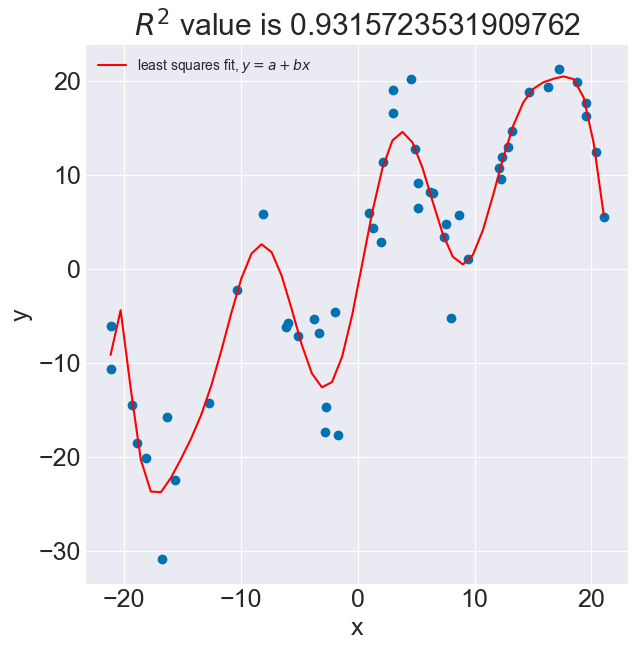

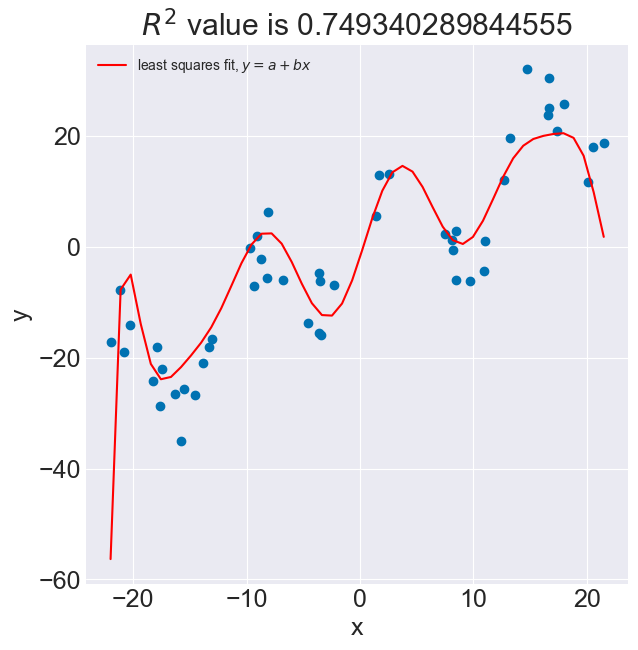

In [156]:
fit_reg = linear_regression.LinearRegression(fit_set)
fit_reg.poly_regression('X', 'Y', 15)
fit_reg.scatter('X', 'Y', 'X vs. Y')
fitted_slope = fit_reg.get_fitted_slope()
fitted_intercept = fit_reg.get_fitted_intercept()

validation_reg = linear_regression.LinearRegression(validation_set)
validation_reg.initialize('X', 'Y', fitted_slope, fitted_intercept, 15)
validation_reg.scatter('X', 'Y', 'X vs. Y')

print("MSE for Fitted_Data: " + str(fit_reg.compute_mse()))
print("MSE for Validation_Data: " + str(validation_reg.compute_mse()))

**Question 8:** Describe how the fitted coefficients obtained for the fit set generalize to the validation set. Do they do a good or bad job? Why?

**Question 9:** Does the generalization improve or worsen for polynomial degrees < 15? Are Back up your observations with numbers (e.g. MSE).

**Question 10:** Are there any values/ranges of polynomial degrees that generalize acceptably to the validation set? Why do you think so?

**Question 11:** What happens when you increase the polynomial degree much above 15? Why do you think this happens? Back up your observations with numbers (e.g. MSE).

**Answer 8:** 
Using a polynomial degree of 15, we can see that the fitted coefficients obtained for the fit set does not do a good job in generalizing the validation set. This is because a high degree of polynomial only means the curve will be adjusted so that the MSE of the original data is minimized. However, it does a poor job in predicing new data. 

**Answer 9:** 
Generalization worsen when you use polynomial degrees < 15 because MSE for the validation set is decreasing. 

**Answer 10:** 
A range of values that generalize acceptably to the validation set would be 5-7. This is because looking at the scatter plot, I could see there are around 6 critical points where the curvature of the curve changes. When tested with a degree of 7, we could also see that the R^2 value for the fit set and validation set was similar meaning that it was able to generalize new data well.

**Answer 11:**
When using an even higher degree than 15, your data will become far more overfitted, making it worse when trying to predict new data. Your curve is adjusted to the fit set so much to the extent that predicting new data will cause large differences in the error. 

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

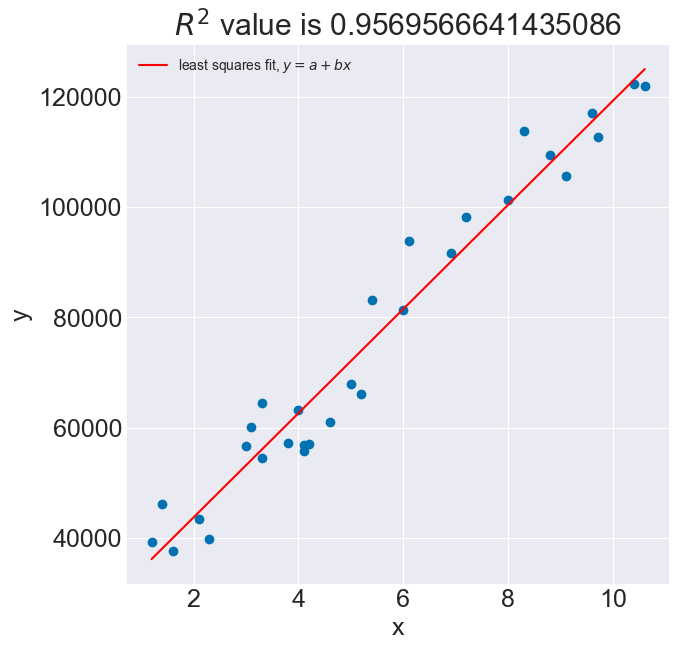

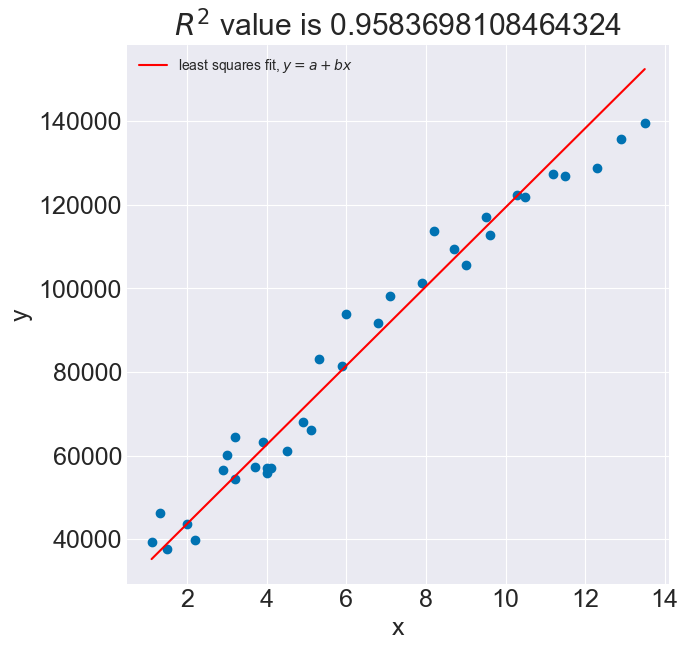

In [175]:
salary_filename = 'data/Salary_dataset.csv'
salary_data = data.Data(salary_filename)
salary_reg = linear_regression.LinearRegression(salary_data)
salary_reg.poly_regression(['YearsExperience'], 'Salary', 1)
salary_reg.scatter('YearsExperience', 'Salary', 'Salary vs. Years of Experience')
salary_slope = salary_reg.get_fitted_slope()
salary_intercept = salary_reg.get_fitted_intercept()

new_salary_filename = 'data/Salary.csv'
new_salary_data = data.Data(new_salary_filename)
new_salary_reg = linear_regression.LinearRegression(new_salary_data)
new_salary_reg.initialize(['YearsExperience'], 'Salary', salary_slope, salary_intercept, 1)
new_salary_reg.scatter('YearsExperience', 'Salary', 'X vs. Y')

Using two seperate salary dataset found on Kraggle, I wanted to see how well the fit of the first data set can be used to predict the new dataset. Upon plotting the data, I found that the scatter plot had a linear trend, so I attempted to run the model with a linear regression. I then saved the slope and intercept of the fitted line and initialize the validation set with those values. Plotting the data, we could see the line of best fit did very well in predicting new data. Both datasets had high R^2 values of around 0.95 and the MSE was minimized. 

### 2. Linear regression algorithm comparison

- Compare the linear regression methods that you implemented on a dataset of your choice.
- Research and implement matrix condition number. Find a dataset with a poor matrix condition number and then compare the regression methods. Which does best and why?

In [273]:
housing_file = 'data/kc_house_data.csv'
house_data = data.Data(housing_file)
house_lin_reg = linear_regression.LinearRegression(house_data)

print(house_data.get_headers())

house_lin_reg.linear_regression(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15'], 'sqft_lot15', 'scipy')
print(house_lin_reg.compute_mse())

house_lin_reg.linear_regression(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15'], 'sqft_lot15', 'qr')
print(house_lin_reg.compute_mse())

house_lin_reg.linear_regression(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15'], 'sqft_lot15', 'normal')
print(house_lin_reg.compute_mse())

['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
348624135.8610781
12723913797.12622
2916614963.6291456


Here, housing data was used from Kraggle to see how each variables can be correlated with others. The data was also performed with a linear regression model, but it had lots of noise, so it became hard for the model to run. The results was unexpected as the worst method we got was from using the QR method. The best method still is scipy method. 

### 3. Confidence intervals or other kinds of error bars on linear regression plots

- Add the option to plot 95% confidence intervals on the linear regression predictions in your plot functions (e.g. `scatter`). [This website](https://real-statistics.com/regression/confidence-and-prediction-intervals/) should be a helpful reference.

### 4. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

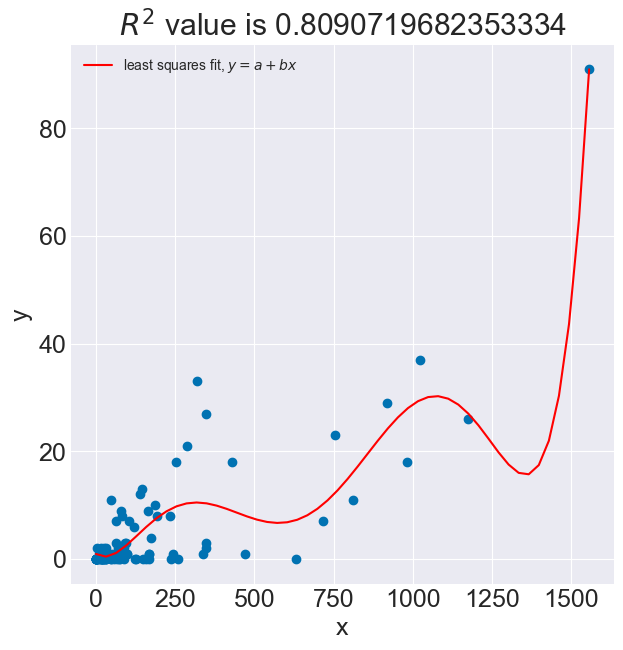

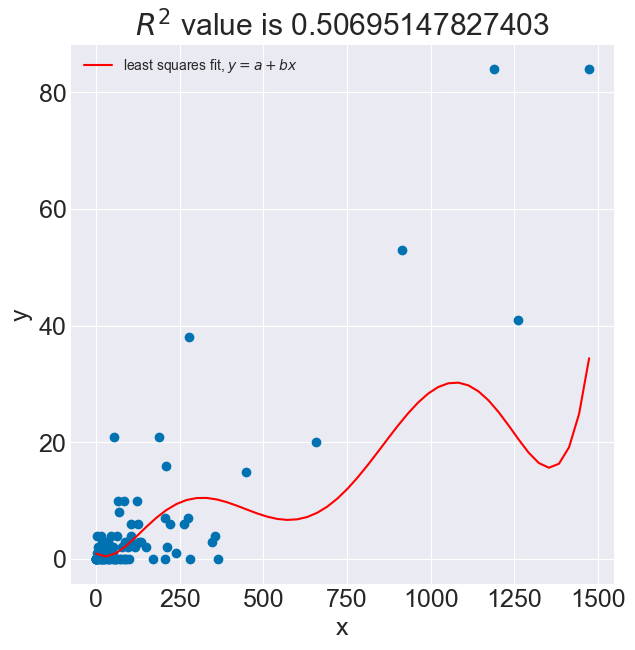

In [272]:
poly_file = 'data/covid.csv'

poly_fit = data.Data(poly_file)
poly_fit.shuffle()
poly_fit.limit_samples(0,100)
poly_lin_reg = linear_regression.LinearRegression(poly_fit)

poly_lin_reg.poly_regression(['New_cases'], 'New_deaths', 6)
poly_lin_reg.scatter('New_cases', 'New_deaths', 'X vs. Y')
fit_slope = poly_lin_reg.get_fitted_slope()
fit_intercept = poly_lin_reg.get_fitted_intercept()

poly_valid = data.Data(poly_file)
poly_valid.shuffle()
poly_valid.limit_samples(100,200)
poly_lin_reg = linear_regression.LinearRegression(poly_valid)

poly_lin_reg.initialize(['New_cases'], 'New_deaths', fit_slope, fit_intercept, 6)
poly_lin_reg.scatter('New_cases', 'New_deaths', 'X vs. Y')

**Note**

It was very hard to find data that could be done using real world data because there are lots of noise. I attempted to use housing data, covid-19 data, and many data meant to be used for visualizing overfitting, however, when plotting the data, there was lots of noise and no degree of polynomial could create a good fit. Using the housing data as an example, I expected the housing price to have a linear relationship with square ft of living space, but when data was plotted, it seemed like there wasn't much correlation. 

**Analysis**

In this extension, I attempted to find a degree of polynomial that would cause overfitting. In the process, I created a new method within the data class that shuffles the data so that selecting fit and validation sets are randomized. For this method to work, both data objects would have to be able to be shuffled the same way. I implmented this by using np.random.RandomState. This method allows you to set a seed so that any ndarray that uses the shuffle method is shuffled in the same way. For the shuffling to work, the method required using the command np.random.shuffle(). After shuffling, a fit and validation set was created and the regression was ran for the fit set. The saved slope and intercept was then used on the validation set to check the fit of the line. Here, we can see that the line does generalize for new data as well.

I started testing the degree of polynomial at 1 and increased it to see when overfitting began to happen. I saw there was a lower R^2 value beginning at degree of 6. Although the line of fit had a high R^2 value of 0.8 for the original data, it did not generalize well when I inputted the new data. I would say a reasonable degree of polynomial to be used for this covid-19 dataset would be 2 or 3. 


### 5. Stepwise linear regression

- Implement the stepwise linear regression discussed in class where you add variables to the regression model one-by-one in a greedy fashion: each variable added out of the available ones not already entered in the regression should result in the largest increase in the adjusted $R^2$ value on the validation data.